## Packages

In [1]:
from netCDF4 import Dataset as NetCDFFile # extract the nc4 file to get geography data
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import os, sys
import numpy
# sys.maxsize
numpy.set_printoptions(threshold=100)
 
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
 
#search for specific base file: find `conda info --base` -name epsg
os.environ["PROJ_LIB"] ='/opt/anaconda3/pkgs/proj4-5.2.0-h0a44026_1/share/proj/'
from mpl_toolkits.basemap import Basemap #ploting the US map; install by `conda install -c anaconda basemap`

# Drawing in Basemap

In [2]:
geography_file = NetCDFFile("GRACEDADM_CLSM0125US_7D.A20210628.030.nc4")
 
lat_us = geography_file.variables['lat'][:]; 
lon_us = geography_file.variables['lon'][:]
lon_us, lat_us = np.meshgrid(lon_us, lat_us); 
time_us = geography_file.variables['time'][:]
gws_inst = geography_file.variables['gws_inst'][:] # Groundwater Percentile
rtzsm_inst = geography_file.variables["rtzsm_inst"][:] # Root Zone Soil Moisture Percentile
sfsm_inst = geography_file.variables["sfsm_inst"][:] #Surface Soil Moisture Percentile

gws_filled_data_us = gws_inst.filled(fill_value=np.nan)
rtzsm_filled_data_us = rtzsm_inst.filled(fill_value=np.nan)
sfsm_filled_data_us = sfsm_inst.filled(fill_value=np.nan)

In [3]:
#drawing in the borders with projection llc
fig = plt.figure(figsize=(2.5, 2))
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_0=33, lon_0=-95)
#map.drawcoastlines(); map.drawstates(); map.drawcountries(); 
#map.drawlsmask(land_color='Linen', ocean_color='#CCFFFF') # can use HTML names or codes for colors
 
#drawing with shades
#map.drawcounties() # you can even add counties (and other shapefiles!)
fig = plt.figure(figsize=(2.5, 2))
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_0=33,lon_0=-95)
#map.shadedrelief(scale=0.5)

<Figure size 180x144 with 0 Axes>

<Figure size 180x144 with 0 Axes>

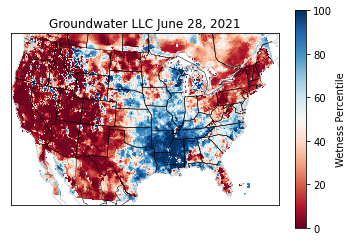

In [4]:
#plotting groundwater
map.pcolormesh(lon_us, lat_us, gws_filled_data_us[0], latlon=True, vmin=0.0,vmax=0.5, cmap= 'RdBu');
#map.pcolormesh(lon, lat, rtzsm_filled_data[0], latlon=True, vmin=0.0,vmax=0.5, cmap= 'RdBu');
#map.pcolormesh(lon, lat, sfsm_filled_data[0], latlon=True, vmin=0.0,vmax=0.5, cmap= 'RdBu');

plt.clim(0, 100); map.drawcoastlines(color='lightgray'); map.drawstates(); map.drawcountries(); 
plt.title('Groundwater LLC June 28, 2021'); plt.colorbar(label='Wetness Percentile')

# Drawing Global Projection

In [5]:
global_file = NetCDFFile("GRACEDADM_CLSM025_GL_7D.A20210628.020.nc4")
 
lat_glo = global_file.variables['lat'][:]; 
lon_glo = global_file.variables['lon'][:]
lon_glo, lat_glo = np.meshgrid(lon_glo, lat_glo); 
time_glo = global_file.variables['time'][:]
gws_inst = global_file.variables['gws_inst'][:] # Groundwater Percentile
rtzsm_inst = global_file.variables["rtzsm_inst"][:] # Root Zone Soil Moisture Percentile
sfsm_inst = global_file.variables["sfsm_inst"][:] #Surface Soil Moisture Percentile
 
gws_filled_data_glo = gws_inst.filled(fill_value=np.nan)
rtzsm_filled_data_glo = rtzsm_inst.filled(fill_value=np.nan)
sfsm_filled_data_glo = sfsm_inst.filled(fill_value=np.nan)

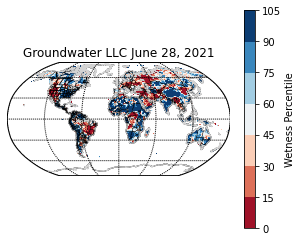

In [6]:
fig = plt.figure(figsize=(5, 4))
m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawcoastlines()
 
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
 
plt.title("Robinson Projection")
#plotting groundwater
'''
color_theme=[(52/235, 235/235, 86/235), (52/235, 70/235, 235/235), 
(165/235, 52/235, 235/235)]           
df.plot(color=color_theme)
'''         

m.contourf(lon_glo, lat_glo, gws_filled_data_glo[0], latlon=True, vmin=0.0,vmax=100, cmap = 'RdBu');
plt.clim(0, 100); m.drawcoastlines(color='lightgray'); m.drawstates(); m.drawcountries(); 
plt.title('Groundwater LLC June 28, 2021'); plt.colorbar(label='Wetness Percentile')

# 3D plotting test for scatter

(40, 96)
(40, 96)
(40, 96)


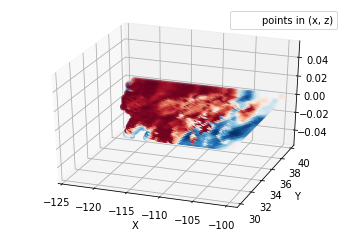

In [7]:
ax = plt.figure().add_subplot(projection='3d')
# lon=-110,-100; lat=30, 40 
x = lon_glo; y = lat_glo 
# min/max of lon = -180/180; 
# min/max of lat = -60/90; 
 
minlat,minlon=-60,-180
 
#lat/lons of selected box
 
Lowlat,uplat,leftlon,rightlon=30,40,-124,-100
 
#result = np.where((lat >= 40) & (lat < 40.3))
#print(result)
#x = np.reshape(x, 864000); y = np.reshape(y, 864000)
 
#indices: lon(224, 320), lat(360, 400)
lowlat = 30; uplat = 40;
leftlon = -124; rightlon = -100;
 
y1,y2,x1,x2=(lowlat-minlat)*4, (uplat-minlat)*4, (leftlon-minlon)*4, (rightlon-minlon)*4

x = x[360:400, 224:320]
y = y[360:400, 224:320]
print(x.shape)
print(y.shape)
#600*1440=864000;
#150x4*360x4; 
#-60/90 (ylat) & -180/180 (xlon)
input = rtzsm_filled_data_glo[0]
#a_file = open("a.txt", "w"); text = gws_inst.data; print(text, file=a_file); a_file.close()
input = input[360:400, 224:320]
print(input.shape) 
ax.scatter(x, y, zs= 0, zdir='z', c=input, cmap="RdBu", label='points in (x, z)')
# Make legend, set axes limits and labels
ax.legend()
 
#ax.set_xlim(480, 520); ax.set_ylim(280, 320); ax.set_zlim(-50, 200)
#ax.set_xlim(-180, 180); ax.set_ylim(-60, 90); ax.set_zlim(-50, 200)
ax.set_xlabel('X'); ax.set_ylabel('Y');
 
# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
#https://stackoverflow.com/questions/43831123/python-best-way-to-draw-3d-function-with-random-x-and-y
 
ax.view_init(elev=30, azim=-70); plt.show();


In [8]:
'''
ax = plt.figure().add_subplot(projection='3d')
 
ax.scatter(x, y, zs=-20, zdir='-z', c=sfsm_filled_data[0], label='points in (x, z)')
 
# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(180, -180); ax.set_ylim(90, -60); ax.set_zlim(-50, 50)
ax.set_xlabel('X'); ax.set_ylabel('Y');
ax.view_init(elev=70, azim=90); plt.show();
'''

"\nax = plt.figure().add_subplot(projection='3d')\n \nax.scatter(x, y, zs=-20, zdir='-z', c=sfsm_filled_data[0], label='points in (x, z)')\n \n# Make legend, set axes limits and labels\nax.legend()\nax.set_xlim(180, -180); ax.set_ylim(90, -60); ax.set_zlim(-50, 50)\nax.set_xlabel('X'); ax.set_ylabel('Y');\nax.view_init(elev=70, azim=90); plt.show();\n"

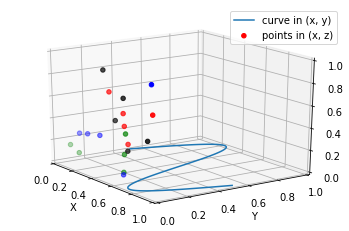

In [9]:
ax = plt.figure().add_subplot(projection='3d')
 
# Plot a sin curve using the x and y axes.
x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x, y, zs=0, zdir='z', label='curve in (x, y)')
 
# Plot scatterplot data (20 2D points per colour) on the x and z axes.
colors = ('r', 'g', 'b', 'k')
 
# Fixing random state for reproducibility
np.random.seed(19680801)
 
x = np.random.sample(5 * len(colors)); y = np.random.sample(5 * len(colors))
c_list = []
for c in colors:
    c_list.extend([c] * 5)
# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x, y) points are plotted on the x and z axes.
ax.scatter(x, y, zs=0, zdir='y', c=c_list, label='points in (x, z)')
 
# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(0, 1); ax.set_ylim(0, 1); ax.set_zlim(0, 1)
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
 
# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35)
 
plt.show()
